### Classifiction using Gaussian process classifier

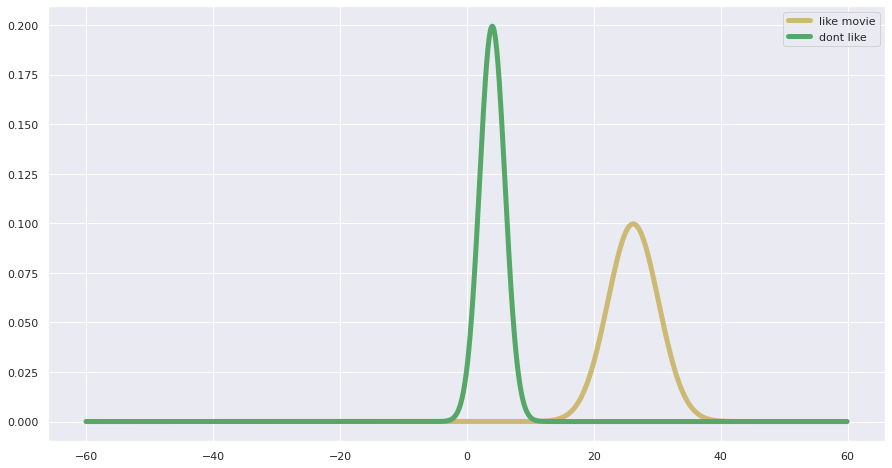

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
x_axis = np.arange(-60, 60, 0.1)
plt.figure(figsize=(15, 8))
plt.plot(x_axis, norm.pdf(x_axis, 26.2, 4) , label='like movie', c='y', linewidth=5)
plt.plot(x_axis, norm.pdf(x_axis, 4, 2), label='dont like', c='g', linewidth=5)

plt.legend()
plt.show()

In [18]:
# importing the wine dataset
from sklearn.datasets import load_wine
import pandas as pd

# loading the dataset
wine=load_wine()

#converting the data to dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

# checking the heading
data.shape


(178, 14)

In [20]:
# finding the null values
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:>

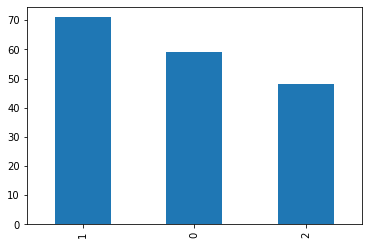

In [23]:
# importing the module
import matplotlib.pyplot as plt

#Convert the target variable to categorical.
data.target=data.target.astype('int64').astype('category')

#finding the frequency 
freq=data['target'].value_counts()

#plotting the bar graph
freq.plot(kind='bar')

In [24]:
# input and output
Input, output = load_wine(return_X_y=True)

In [45]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.20)

In [46]:
# importing the required module
from sklearn.gaussian_process import GaussianProcessClassifier

# initializing the classifier
model = GaussianProcessClassifier()

# training the model
model.fit(X_train, y_train)


GaussianProcessClassifier()

In [47]:
# predictions
prediction = model.predict(X_test)

[[ 2  0  5]
 [ 0  5  8]
 [ 0  3 13]]


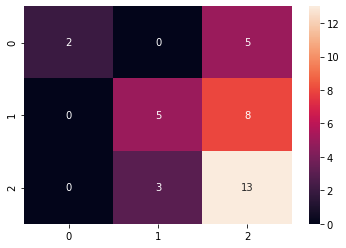

In [48]:
# importing the modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# providing actual and predicted values
cm = confusion_matrix(y_test, prediction)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')
print(cm)

In [50]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# accuracy
accuracy_score(y_test,prediction)

0.5555555555555556

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel





In [61]:
# # define model
# model = GaussianProcessClassifier()

# # define grid
# grid = dict()
# grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]
# # define search
# search = GridSearchCV(model, grid, scoring='accuracy')
# # perform the search
# results = search.fit(X_train, y_train)
# # summarize best
# print('Best Mean Accuracy: %.3f' % results.best_score_)
# print('Best Config: %s' % results.best_params_)
# # summarize all
# means = results.cv_results_['mean_test_score']
# params = results.cv_results_['params']
# for mean, param in zip(means, params):
#     print(">%.3f with: %r" % (mean, param))

In [66]:
# function to print the total time
def timer(start_time=None):

    # starting the time
    if not start_time:
        start_time = datetime.now()
        return start_time
    # ending the time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)

        # printing the total time
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [67]:
# importing the modules
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel

# define grid
grid = dict()
grid['kernel'] = [1*RBF(), 1*DotProduct(), 1*Matern(),  1*RationalQuadratic(), 1*WhiteKernel()]

In [69]:
# importing required module
from sklearn.model_selection import GridSearchCV
from datetime import datetime

model = GaussianProcessClassifier()
# applying GridSearchCV
model=GridSearchCV(model, grid, scoring='accuracy')

# timing starts from this point for "start_time" variable
start_time = timer(None) 

# training the model
model.fit(X_train,y_train)

# timing ends here for "start_time" variable
timer(start_time) 

# printing the best estimator
print("\nThe best estimator returned by GridSearch CV is:",model.best_estimator_)

/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_proce


 Time taken: 0 hours 2 minutes and 56.6 seconds.

The best estimator returned by GridSearch CV is: GaussianProcessClassifier(kernel=1**2 * DotProduct(sigma_0=1))


In [70]:
# define model
model_optimum = GaussianProcessClassifier(kernel=1**2 * DotProduct(sigma_0=1))

# training the model
model_optimum.fit(X_train,y_train)


GaussianProcessClassifier(kernel=1**2 * DotProduct(sigma_0=1))

In [72]:
#  predictions
prediction_optimum = model.predict(X_test)

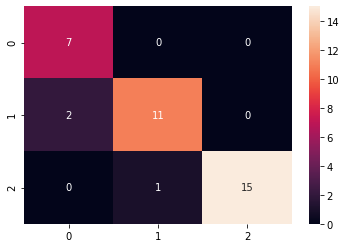

In [73]:
# providing actual and predicted values
cm = confusion_matrix(y_test, prediction_optimum)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')

In [74]:
# accuracy
accuracy_score(y_test,prediction_optimum)

0.9166666666666666

## Gaussian process regression

In [76]:
# importing the module
import pandas as pd

# importing the dataset
dushanbe = pd.read_csv('Dushanbe_house.csv')

# heading
dushanbe.head()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000


In [78]:
# dropping the column
dushanbe.drop('Unnamed: 0', axis=1, inplace=True)

In [80]:
# removing null values
dushanbe.dropna(inplace=True)

# checking null values
dushanbe.isnull().sum()

number_of_rooms    0
floor              0
area               0
latitude           0
longitude          0
price              0
dtype: int64

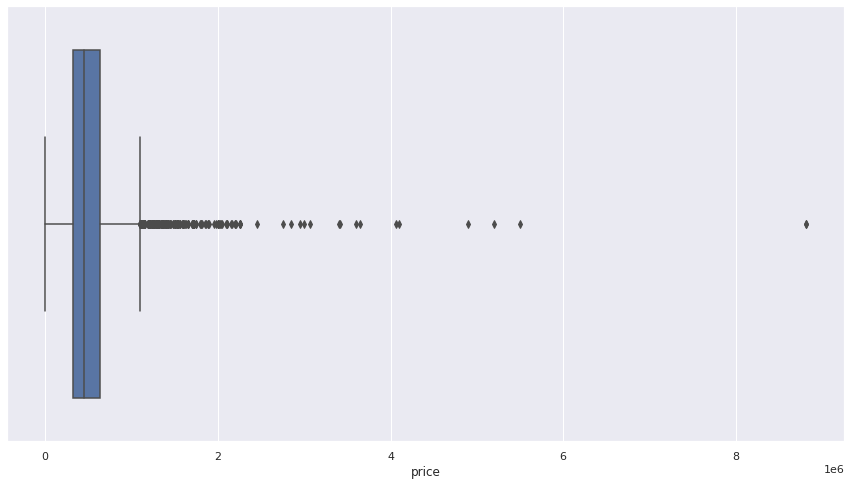

In [90]:
# importing the module
import seaborn as sns

# setting the theme stype
sns.set_theme(style="whitegrid")

# setting the size of plot
sns.set(rc = {'figure.figsize':(15,8)})

# plotting the boxplot
ax = sns.boxplot(x=dushanbe["price"])

In [91]:
# splitting our dataset into independent and dependent variables
x_data = dushanbe.drop('price', axis=1)
y_data = dushanbe.price

In [92]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [93]:
# printing
print("size of training dataset is:", X_train.shape)
print("size of testing  dataset is:", X_test.shape)


size of training dataset is: (2797, 5)
size of testing  dataset is: (933, 5)


In [123]:
# importing the module
from sklearn.gaussian_process import GaussianProcessRegressor

# initializing the algorithm with default parameters
gp_regressor = GaussianProcessRegressor()

# training the model
gp_regressor.fit(X_train, y_train)

GaussianProcessRegressor()

In [124]:
# predicting
gp_predictions = gp_regressor.predict(X_test)

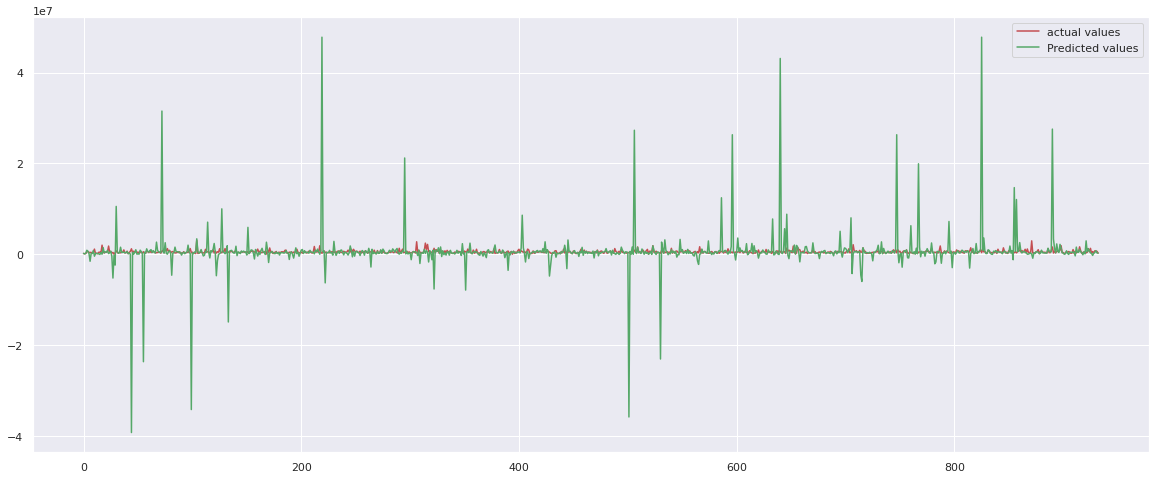

In [125]:
# importing the module
import matplotlib.pyplot as plt

# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values", c='r')
plt.plot([i for i in range(len(y_test))],gp_predictions, label="Predicted values", c='g')

# showing the plotting
plt.legend()
plt.show()

In [126]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, gp_predictions))

R score is : -175.0533757348941


In [116]:

# print("\nThe best estimator returned by GridSearch CV is:",model.best_estimator_)

/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:335: RuntimeWarning: divide by zero encountered in log
  return np.log(np.vstack(bounds))
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:1536: RuntimeWarning: divide by zero encountered in true_divide
  dists = pdist(X / length_scale, metric="sqeuclidean")
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:1536: RuntimeWarning: invalid value encountered in true_divide
  dists = pdist(X / length_scale, metric="sqeuclidean")
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/ker


 Time taken: 0 hours 1 minutes and 46.82 seconds.


In [127]:
# importing the modeul
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# setting the kernel
kernel = DotProduct() + WhiteKernel()

In [128]:
# importing the module
from sklearn.gaussian_process import GaussianProcessRegressor

# trainining the model
gp = GaussianProcessRegressor(kernel=kernel)

# training the model
gp.fit(X_train, y_train)

/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/home/uca/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1))

In [129]:
# predicting
gp_p= gp.predict(X_test)

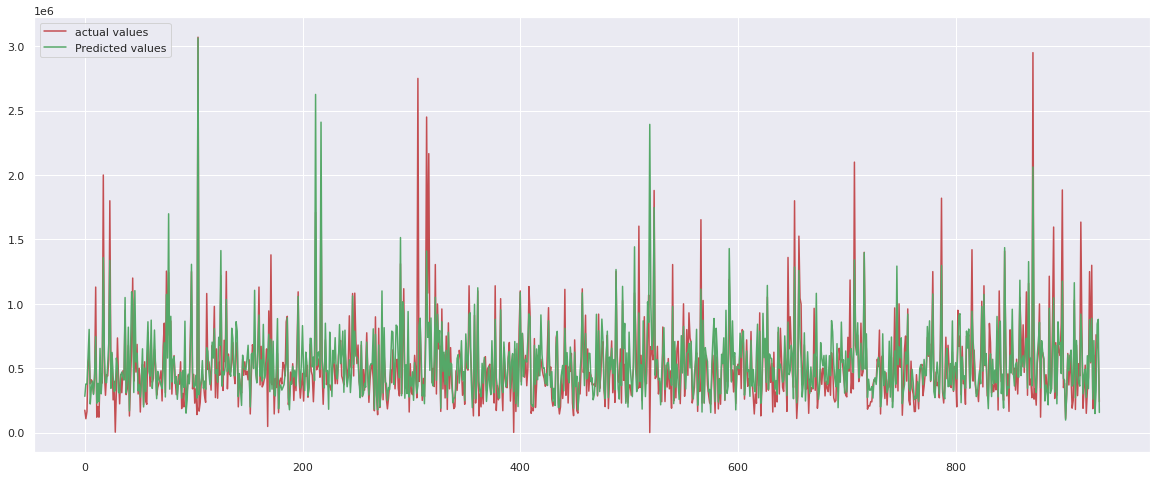

In [130]:
# fitting the size of the plot
plt.figure(figsize=(20, 8))

# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, label="actual values", c='r')
plt.plot([i for i in range(len(y_test))],gp_p, label="Predicted values", c='g')

# showing the plotting
plt.legend()
plt.show()

In [131]:
# Importing the required module
from sklearn.metrics import r2_score

# Evaluating the model
print('R score is :', r2_score(y_test, gp_p))

R score is : 0.5823665248001054
